# Evaluate model in paper Machine Learning for Trading
Link [paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3015609)

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())
os.chdir(path.parent.absolute())

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from stable_baselines3.dqn import DQN
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy

import stock_env
from stock_env.utils import *

%matplotlib inline

In [2]:
from stable_baselines3.common.env_checker import check_env
check_env(gym.make('SingleStock-v0'))

In [3]:
# quick evaluate
env = gym.make('SingleStock-v0')
model = DQN.load("log/dqn_SingleStock-v0", env=env)
mean, std = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
print(f"Mean reward: {mean:.2f} +/- {std: .2f}")

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Mean reward: 403704.84 +/-  0.00


In [15]:
# run model to get detailed information in the enviroment
done = False
obs = env.reset()
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, _, done, _ = env.step(action)

# get data
history_df = pd.DataFrame(env.history)
history_df.index = pd.date_range('2018-01-01', periods=history_df.shape[0])
df = env.df
df = df.rename(columns={df.columns.item():'price'})
df.index = pd.date_range('2018-01-01', periods=df.shape[0])
data = df.join(history_df)
data = data.dropna()


    Annual return     :  17.35%
    Cumulative return :  2288.09%
    Sharpe ratio      :  1.84
    Maximum Drawdown  : -13.77%
    Annual Volatility :  8.90%
    Value-At-Risk     :  nan%
    


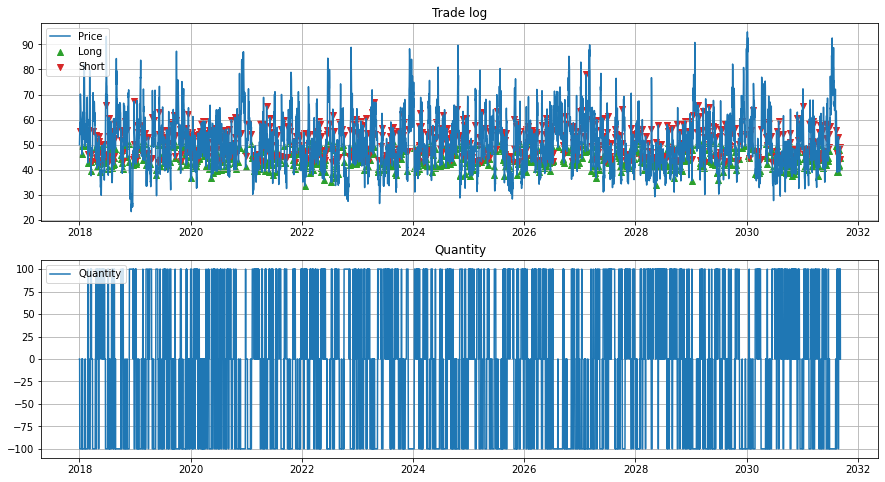

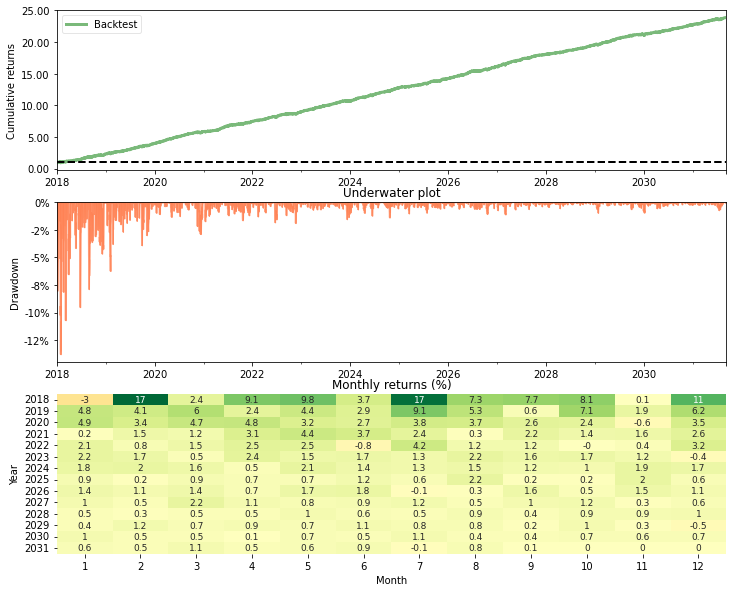

In [16]:
temp_df = data#[(data.index.year == 2026)]
plot_trade_log(temp_df)
create_performance(temp_df['portfolio_value'].pct_change())